## Ganiyu Saheed Adisa
### Home Work #4

In [1]:
# importing all the necessary packages
import numpy as np
from matplotlib import pyplot as plt
from random import normalvariate
from numpy.linalg import matrix_power
from numpy.linalg import eig
from scipy.stats import norm, t
from sympy import *
init_printing()

**Problem 23.2.** Write a random number generator that produces numbers distributed according to density distribution function
$$
f(x)= \begin{cases}x^2, & 0 \leq x \leq 1 \\ \sqrt{2-x}, & 1 \leq x \leq 2 \\ 0, & x \leq 0 \text { or } x \geq 2 .\end{cases}
$$
**Solution** \
We have the CDF as:
$$
F(x)=\left\{\begin{array}{ll}
0, & x<0 \\
\frac{x^3}{3}, & 0 \leq x \leq 1 \\
1-\frac{2}{3}(2-x)^{3 / 2}, & 1 \leq x \leq 2 \\
1, & \text { otherwise. }
\end{array}\right.
$$
Taking the inverse of $F(x)$, we have
$$
X=\left\{\begin{array}{ll}
(2 u)^{1 / 3}, & 0 \leq u \leq \frac{1}{3} \\
2-\left(\frac{3}{2}(1-u)\right)^{2 / 3}, & \frac{1}{3} \leq u \leq 1 .
\end{array}\right.
$$

(array([  8800.,  57802., 154605., 299294., 153267., 377624., 331860.,
        281098., 216859., 118791.]),
 array([0.00739963, 0.20664233, 0.40588502, 0.60512771, 0.80437041,
        1.0036131 , 1.20285579, 1.40209849, 1.60134118, 1.80058387,
        1.99982656]),
 <BarContainer object of 10 artists>)

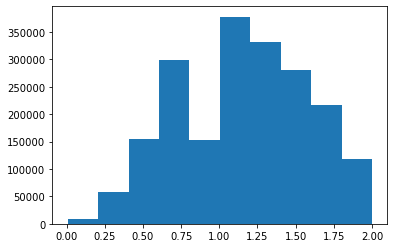

In [3]:
N = 2000000
rnd = np.random.random(N)  # generating a random numbers u \in [0,1) of N lenght
def f1(u):  # defining the first peicewise function of F(X) inverse
    return (2*u)**(1/3)
def f2(u):  # defining the second peicewise function of F(X) inverse
    return 2-((3/2)*(1-u))**(2/3)

# Using comprehension list to compute X
X = np.array([f1(u) if u <= (1/3) else f2(u) for u in rnd])
plt.hist(X)

**Problem 24.1**
1. A mouse, starting from cell 4 , runs through the maze on the right. At each step it moves to a neighboring cell that is not separated by a wall (chosen with equal probability, independently of the past). The mouse continues moving in this way until it eats the cheese at cell 13 (after that it escapes to the outside), or it is eaten by the cat at cell $14$. Find (by means of your choice, e.g., analytically, or studying eigenvectors of the corresponding Markov chain transition matrix, or by Monte Carlo method, etc.) the probability that the mouse escapes.

![alt text here](ffig1.png)

We approach the problem by Markov method by creating its transition matrix $T_{ij}$ of size 16 by 16 as we consider each cell as a state. Then, we compute probability state vector distribution i.e. $\pi(t+k) = \pi(t)T^{k}$ in order to get stationary distribution i.e. $\pi^{*} = \pi^{*}T$ .

In [3]:
# Building the transition matrix T
r1 = [0,1/2,0,0,1/2,0,0,0,0,0,0,0,0,0,0,0]
r2 = [1/3,0,1/3,0,0,1/3,0,0,0,0,0,0,0,0,0,0]
r3 = [0,1/2,0,1/2,0,0,0,0,0,0,0,0,0,0,0,0]
r4 = [0,0,1/2,0,0,0,0,1/2,0,0,0,0,0,0,0,0]
r5 = [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
r6 = [0,1/2,0,0,0,0,0,0,0,1/2,0,0,0,0,0,0]
r7 = [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
r8 = [0,0,0,1/3,0,0,1/3,0,0,0,0,1/3,0,0,0,0]
r9 = [0,0,0,0,0,0,0,0,0,1/2,0,0,1/2,0,0,0]
r10 = [0,0,0,0,0,1/3,0,0,1/3,0,1/3,0,0,0,0,0]
r11 = [0,0,0,0,0,0,0,0,0,1/2,0,0,0,0,1/2,0]
r12 = [0,0,0,0,0,0,0,1/2,0,0,0,0,0,0,0,1/2]
r13 = [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
r14 = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
r15 = [0,0,0,0,0,0,0,0,0,0,1/3,0,0,1/3,0,1/3]
r16 = [0,0,0,0,0,0,0,0,0,0,0,1/2,0,0,1/2,0]
T = np.array([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15,r16])

# Computing the stationary distribution
k = 3000
T_k = matrix_power(T, k) #taking the power of matrix in k times
pi_0 = np.array([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
pi = np.matmul(pi_0,T_k)
print("The stationary distribution is =\n", pi)
print("\n The probability that the mouse escapes is =", pi[12])

The stationary distribution is =
 [0.00000000e+00 4.26145149e-37 0.00000000e+00 2.98393944e-37
 1.59094279e-37 0.00000000e+00 1.44528432e-37 0.00000000e+00
 0.00000000e+00 2.16585823e-37 0.00000000e+00 2.33263999e-37
 3.91304348e-01 6.08695652e-01 1.53995122e-37 0.00000000e+00]

 The probability that the mouse escapes is = 0.39130434782608686


**Alternatively:** Using the eigen vector of the transiton matrix

In [4]:
T2=Matrix(T)
T2=T2.eigenvects()    # Computing the eigenvector
t1=T2[10][2][0]
t2=T2[11][2][0]

In [5]:
A = np.matrix([[t1[12],t2[12]], [t1[13],t2[13]]], dtype="float")
#A_inv=np.linalg.inv(A)
x1 = np.linalg.solve(A,[1,0])
x2 = np.linalg.solve(A,[0,1])
prob1 = x1[0]*t1 + x1[1]*t2  # computing the probability of escaping from any cell
prob2 = x2[0]*t1 + x2[1]*t2  # computing the probability of ending in cat-cell from any cell
prob1

⎡0.478260869565217⎤
⎢                 ⎥
⎢0.478260869565217⎥
⎢                 ⎥
⎢0.434782608695652⎥
⎢                 ⎥
⎢0.391304347826087⎥
⎢                 ⎥
⎢0.478260869565217⎥
⎢                 ⎥
⎢0.521739130434782⎥
⎢                 ⎥
⎢0.347826086956521⎥
⎢                 ⎥
⎢0.347826086956521⎥
⎢                 ⎥
⎢0.782608695652174⎥
⎢                 ⎥
⎢0.565217391304348⎥
⎢                 ⎥
⎢0.391304347826087⎥
⎢                 ⎥
⎢0.304347826086956⎥
⎢                 ⎥
⎢       1.0       ⎥
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎢0.217391304347826⎥
⎢                 ⎥
⎣0.260869565217391⎦

The resulted vector above shows the probability of reaching the cheese cell (cell#13) from any other cells, where the probability of the mouse escaping from cell#4 is 0.391304347826087

**Problem 24.2.**

2. Consider a diffusing particle (with diffusion coefficient $D=\frac{1}{2}$ ) inside the triangle $x \geq 0, y \geq 0$, and $x+y \leq 1$. The particle starts at $x(0)=y(0)=\frac{1}{3}$. Find the distribution of the hitting the walls of the triangle time.

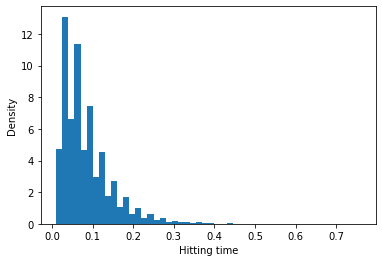

In [6]:
# defining the triangle boundaries
x_min, x_max = 0, 1
y_min, y_max = 0, 1
xy_max = 1
D = 0.5        #diffusion coefficient
dt = 0.01      #time step size
x0 = y0 = xy_max / 3   #initial particle position
N = 100000             # number of samples 

# initializing the arrays to store the hitting times and particle positions
th = np.zeros(N)
x = np.zeros((N, 2))
x[:, 0] = x0
x[:, 1] = y0

# Simulate the particle diffusion until it hits one of the walls of the triangle
for i in range(N):
    while (x[i, 0] >= x_min and x[i, 1] >= y_min and x[i, 0] + x[i, 1] <= xy_max):
        dx = np.random.normal(0, np.sqrt(2*D*dt), size=2)
        x[i] += dx
        th[i] += dt
    # Reflect the particle off the boundary
    if x[i, 0] < x_min:
        x[i, 0] = 2*x_min - x[i, 0]
    elif x[i, 1] < y_min:
        x[i, 1] = 2*y_min - x[i, 1]
    elif x[i, 0] + x[i, 1] > xy_max:
        x[i] = 2*np.array([x_max, y_max]) - x[i]

# Plotting the histogram of the hitting times
plt.hist(th, bins=50, density=True)
plt.xlabel('Hitting time')
plt.ylabel('Density')
plt.show()

**Observation:** This distribution look like exponential distribution.

**Problem 24.3** Consider a random variable $X \sim N(0,1)$. Use importance sampling to estimate $\mathrm{E} X^{20}$.\

**Solution:**
Given $\mathbb{E}\left[x^{20}\right]$, then using importance Sampling, that is
$$
\begin{aligned}
\mathbb{E}\left[x^{20}\right] & =\int x^{20} f(x) d x \\
& =\int\left[x^{20} \frac{f(x)}{g(x)}\right] g(x) d x \\
& =\mathbb{E}_{g(x)}\left[X^{20} \frac{f(x)}{g(x)}\right]
\end{aligned}
$$
\
Where $f(x)$ is the density function of the Standard normal distribution $X \sim N(0,1)$. Now we consider using Student $t$-distribution as our suitable importance distribution due to its heavier tails than the standard normal distribution when its degree of freedom is small, such as 1 i.e. $t(1)$. In the following figure, Standard normal (blue), t-distribution (red, for degree 1,2, and 3), and previous plots shown in green.\

![alt text here](ffig2.png)
[Source](https://en.wikipedia.org/wiki/Student%27s_t-distribution)

Student's $\boldsymbol{t}$-distribution has the probability density function (PDF) given by
$$
g(x)=\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)}\left(1+\frac{x^2}{\nu}\right)^{-(\nu+1) / 2},
$$
where $\nu$ is the number of degrees of freedom and $\Gamma$ is the gamma function. This may also be written as

In [14]:
# Defining the standard normal density function
def f(x):
    return norm.pdf(x)

# defining the t(1) density function
def g(x):
    return t(1).pdf(x)

N = 100000         # number of samples
x = t(1).rvs(N)    # generating samples from the t(1) distribution
w = f(x) / g(x)    # computing the importance weights
est = np.mean(w * x**20)    # computing the estimate of E[X^20]
print("Estimated value of E[X^20]:", est)

Estimated value of E[X^20]: 649638719.1219126


**Problem 24.7.** Each cookie box independently of others contains one of 100 trading cards with equal probability. Find the distribution of the number of boxes $N$ needed to obtain a full collection. Plot its probability mass function $p: k \mapsto \mathrm{P}(N=k)$. Estimate the probability $\mathrm{P}(N \leq 500)$ that a full collection is obtained from 500 boxes or less.

**Solution** \
We approach the problem by Monte Carlos Method

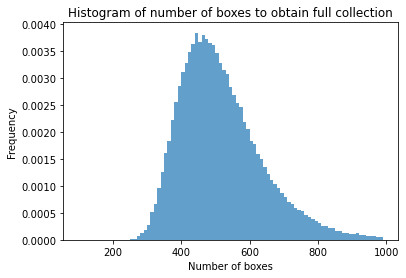

In [7]:
import random

def dist_func():
    cards = set()
    num_boxes = 0
    while len(cards) < 100:
        card = random.randint(1, 100)
        cards.add(card)
        num_boxes += 1
    return num_boxes

N = 100000  # number of trials
results = [dist_func() for _ in range(N)]

plt.hist(results, bins=np.arange(100, 1000, 10), density=True, alpha=0.7)
plt.xlabel('Number of boxes')
plt.ylabel('Frequency')
plt.title('Histogram of number of boxes to obtain full collection')
plt.show()

In [5]:
# Computing of P(N <= 500)
N = 100000    # number of trials
num_successes = sum(dist_func() <= 500 for _ in range(N))
p_success = num_successes / N
print("The estimated probability of obtaining a full collection in 500 boxes or less:", p_success)

The estimated probability of obtaining a full collection in 500 boxes or less: 0.51071
